In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression 

In [3]:
x,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

In [4]:
x.shape

(100, 1)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
x_train.shape

(80, 1)

In [9]:
lr=LinearRegression()

In [10]:
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
lr.coef_

array([28.16404017])

In [12]:
lr.intercept_

np.float64(-2.7130725669241036)

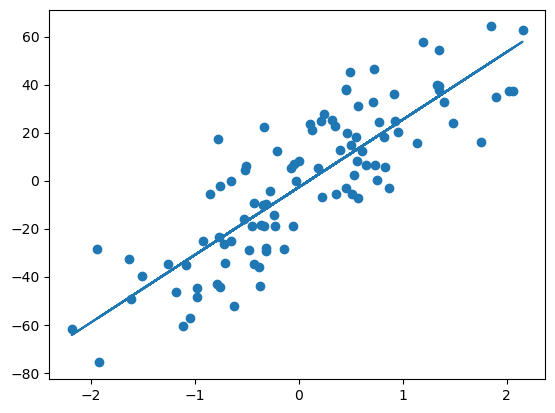

In [14]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x))

Now i will scikit learn ridge

In [51]:
from sklearn.linear_model import Ridge
ri=Ridge(alpha=10)

In [52]:
ri.fit(x_train,y_train)

Ridge(alpha=10)

In [53]:
ri.coef_

array([24.63922736])

In [54]:
ri.intercept_

np.float64(-2.627155359611534)

Now i will make my own ridge class 

In [45]:
class Myridge:
    def __init__(self,alpha):
        self.m=None
        self.b=None
        self.alpha=alpha

    def fit(self,x_train,y_train):
        den=0
        num=0
        for i in range(x_train.shape[0]):
            num=num+(y_train[i]-y_train.mean())*(x_train[i]-x_train.mean())
            den=den+(x_train[i]-x_train.mean())*(x_train[i]-x_train.mean())
        den=den+self.alpha
        self.m=num/den
        self.b=y_train.mean()-self.m*x_train.mean()

    def predict(self,x_test):
        return self.m*x_test+self.b

In [46]:
mr=Myridge(10)

In [47]:
mr.fit(x_train,y_train)

In [49]:
mr.m

array([24.63922736])

In [50]:
mr.b

array([-2.62715536])